In [1]:
import pandas as pd
import time
import numpy as np
import sqlite3

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import pydot
from IPython.display import Image
from pylab import rcParams

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import sys, os
# reload(sys)
# sys.setdefaultencoding('utf-8')

In [3]:
con = sqlite3.connect("airports.sqlite")
con.text_factory = str

In [4]:
operations=pd.read_csv('../assets/Airport_operations.csv')
cancelations=pd.read_csv('../assets/airport_cancellations.csv')
airports=pd.read_csv('../assets/airports.csv')

In [5]:
airports.columns = [('A_'+column.replace(' ', '_')) for column in airports.columns]
cancelations.columns = [('C_'+column.replace(' ', '_')) for column in cancelations.columns]
operations.columns = [('O_'+column.replace(' ', '_')) for column in operations.columns]

In [6]:
airports

,A_Key,A_LocID,A_AP_NAME,A_ALIAS,A_Facility_Type,A_FAA_REGION,A_COUNTY,A_CITY,A_STATE,A_AP_Type,A_Latitude,A_Longitude,A_Boundary_Data_Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes
5,2884.0,RVR,JOSE APONTE DE LA TORRE,Aeropuerto Jos� Aponte De La Torre,Airport,ASO,#NAME?,CEIBA,PR,Public Use,18.245269,-65.643381,Yes
6,2881.0,MAZ,EUGENIO MARIA DE HOSTOS,Aeropuerto Eugenio Mar�a De Hostos,Airport,ASO,#NAME?,MAYAGUEZ,PR,Public Use,18.255694,-67.148472,Yes
7,5087.0,X95,DIEGO JIMENEZ TORRES,NaN,Airport,ASO,#NAME?,FAJARDO,PR,Public Use,18.308010,-65.661828,No
8,5086.0,CPX,BENJAMIN RIVERA NORIEGA,NaN,Airport,ASO,#NAME?,ISLA DE CULEBRA,PR,Public Use,18.313289,-65.304324,No
9,3442.0,STT,CYRIL E KING,Cyril E King International Airport,Airport,ASO,-VIRGIN ISLANDS-,CHARLOTTE AMALIE,VI,Public Use,18.337306,-64.973361,Yes


In [7]:
airports.to_sql('airports', con, if_exists='replace', index=False)

In [8]:
operations

,O_airport,O_year,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_departures,O_percent_on-time_airport_departures,O_percent_on-time_gate_arrivals,O_average_gate_departure_delay,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airport_departure_delay,O_average_airborne_delay,O_average_taxi_in_delay,O_average_block_delay,O_average_gate_arrival_delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48
5,ABQ,2009,42550,42704,0.8341,0.8147,0.8224,9.24,9.88,1.89,10.45,1.74,0.92,1.98,9.27
6,ABQ,2010,42302,42169,0.8144,0.7907,0.8047,10.25,9.95,2.05,11.58,1.66,0.95,1.90,10.23
7,ABQ,2011,42283,42297,0.8072,0.7758,0.8022,10.81,10.50,2.51,12.57,1.58,0.84,1.87,10.63
8,ABQ,2012,39105,39107,0.8219,0.7940,0.8177,10.55,10.27,2.32,12.11,1.41,0.98,1.80,9.73
9,ABQ,2013,35277,34989,0.7710,0.7402,0.7554,12.56,10.77,2.64,14.28,1.60,0.92,2.35,12.76


In [9]:
operations.to_sql('operations', con, if_exists='replace', index=False)

In [10]:
cancelations

,C_Airport,C_Year,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0
5,ABQ,2009.0,192.0,162.0,74.0,26.0
6,ABQ,2010.0,222.0,177.0,71.0,50.0
7,ABQ,2011.0,345.0,294.0,77.0,61.0
8,ABQ,2012.0,237.0,181.0,65.0,60.0
9,ABQ,2013.0,232.0,212.0,62.0,46.0


In [11]:
cancelations.to_sql('cancelations', con, if_exists='replace', index=False)

In [12]:
sql='''
SELECT 
    *
FROM
    (SELECT 
        airports.'A_LocID',
        airports.'A_FAA_REGION',
        airports.'A_AP_Type',
        cancelations.*
    FROM
        airports
    JOIN cancelations ON airports.A_LocID = cancelations.C_Airport) AS airport_cancelations
        JOIN
    operations ON airport_cancelations.A_LocID = operations.O_airport
        AND airport_cancelations.C_Year = operations.O_year
'''
data = pd.read_sql(sql, con)

In [13]:
data

,A_LocID,A_FAA_REGION,A_AP_Type,C_Airport,C_Year,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_airport,...,O_percent_on-time_airport_departures,O_percent_on-time_gate_arrivals,O_average_gate_departure_delay,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airport_departure_delay,O_average_airborne_delay,O_average_taxi_in_delay,O_average_block_delay,O_average_gate_arrival_delay
0,SJU,ASO,Federalized/Commercial,SJU,2004.0,330.0,289.0,55.0,28.0,SJU,...,0.7794,0.7984,11.19,13.84,2.27,12.43,1.88,0.79,3.39,12.28
1,SJU,ASO,Federalized/Commercial,SJU,2005.0,315.0,282.0,64.0,36.0,SJU,...,0.7464,0.7604,12.74,14.14,3.03,14.43,1.63,1.36,4.04,14.65
2,SJU,ASO,Federalized/Commercial,SJU,2006.0,257.0,233.0,63.0,44.0,SJU,...,0.7446,0.7611,11.61,15.75,4.28,14.34,1.73,1.29,4.19,14.17
3,SJU,ASO,Federalized/Commercial,SJU,2007.0,307.0,278.0,70.0,42.0,SJU,...,0.7522,0.7414,12.53,15.22,3.16,14.97,1.55,1.71,4.09,16.31
4,SJU,ASO,Federalized/Commercial,SJU,2008.0,238.0,197.0,78.0,29.0,SJU,...,0.7810,0.7533,12.54,14.22,1.85,13.59,1.64,1.25,3.75,15.18
5,SJU,ASO,Federalized/Commercial,SJU,2009.0,199.0,159.0,57.0,58.0,SJU,...,0.8015,0.7999,11.44,13.29,1.43,12.28,1.22,0.95,2.88,11.77
6,SJU,ASO,Federalized/Commercial,SJU,2010.0,258.0,207.0,82.0,45.0,SJU,...,0.7815,0.7719,12.21,13.04,1.39,13.00,1.65,1.32,3.53,13.40
7,SJU,ASO,Federalized/Commercial,SJU,2011.0,240.0,201.0,101.0,55.0,SJU,...,0.7934,0.7899,10.86,13.23,1.96,12.07,1.45,1.57,3.67,12.28
8,SJU,ASO,Federalized/Commercial,SJU,2012.0,174.0,141.0,62.0,41.0,SJU,...,0.8228,0.8181,9.55,13.15,1.82,10.55,1.41,1.33,2.89,10.64
9,SJU,ASO,Federalized/Commercial,SJU,2013.0,127.0,94.0,65.0,64.0,SJU,...,0.7808,0.7840,12.31,13.56,2.20,13.52,1.78,1.41,2.86,12.96


In [14]:
data.columns

Index([u'A_LocID', u'A_FAA_REGION', u'A_AP_Type', u'C_Airport', u'C_Year',
       u'C_Departure_Cancellations', u'C_Arrival_Cancellations',
       u'C_Departure_Diversions', u'C_Arrival_Diversions', u'O_airport',
       u'O_year', u'O_departures_for_metric_computation',
       u'O_arrivals_for_metric_computation',
       u'O_percent_on-time_gate_departures',
       u'O_percent_on-time_airport_departures',
       u'O_percent_on-time_gate_arrivals', u'O_average_gate_departure_delay',
       u'O_average_taxi_out_time', u'O_average_taxi_out_delay',
       u'O_average_airport_departure_delay', u'O_average_airborne_delay',
       u'O_average_taxi_in_delay', u'O_average_block_delay',
       u'O_average_gate_arrival_delay'],
      dtype='object')

Y is the `Average Airport Departure Delay`. This is the only feature I think is important for passengers and everything leads to that. Also `Percent on time airport departures` is almost the same. Therefore I'm going to remove them both. We can Also have another Y

In [15]:
y=data['O_average_airport_departure_delay']

In [16]:
x=data.drop(['C_Airport', 'O_airport', 
             'O_year','A_FAA_REGION',
             'A_AP_Type','A_LocID', 'C_Year', 
             'O_average_airport_departure_delay',
             'O_percent_on-time_airport_departures',
             'O_average_gate_departure_delay',
             'O_percent_on-time_gate_departures'
            ], axis=1)

In [17]:
x

,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_arrivals,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airborne_delay,O_average_taxi_in_delay,O_average_block_delay,O_average_gate_arrival_delay
0,330.0,289.0,55.0,28.0,60371,56735,0.7984,13.84,2.27,1.88,0.79,3.39,12.28
1,315.0,282.0,64.0,36.0,57736,54870,0.7604,14.14,3.03,1.63,1.36,4.04,14.65
2,257.0,233.0,63.0,44.0,55707,52948,0.7611,15.75,4.28,1.73,1.29,4.19,14.17
3,307.0,278.0,70.0,42.0,47987,47246,0.7414,15.22,3.16,1.55,1.71,4.09,16.31
4,238.0,197.0,78.0,29.0,44493,43448,0.7533,14.22,1.85,1.64,1.25,3.75,15.18
5,199.0,159.0,57.0,58.0,48418,46678,0.7999,13.29,1.43,1.22,0.95,2.88,11.77
6,258.0,207.0,82.0,45.0,47314,45781,0.7719,13.04,1.39,1.65,1.32,3.53,13.40
7,240.0,201.0,101.0,55.0,42803,42401,0.7899,13.23,1.96,1.45,1.57,3.67,12.28
8,174.0,141.0,62.0,41.0,44716,43985,0.8181,13.15,1.82,1.41,1.33,2.89,10.64
9,127.0,94.0,65.0,64.0,42902,42175,0.7840,13.56,2.20,1.78,1.41,2.86,12.96


In [18]:
faa_region=pd.get_dummies(data['A_FAA_REGION'], prefix='faa')
faa_region.head(1)

,faa_AAL,faa_ACE,faa_AEA,faa_AGL,faa_ANE,faa_ANM,faa_ASO,faa_ASW,faa_AWP
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [19]:
a_type=pd.get_dummies(data['A_AP_Type'], prefix='type')
a_type.head(1)

,type_Federalized/Commercial,type_Public Use
0,1.0,0.0


In [20]:
x=pd.concat([x, faa_region, a_type], axis=1)

In [21]:
x

,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_arrivals,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airborne_delay,...,faa_ACE,faa_AEA,faa_AGL,faa_ANE,faa_ANM,faa_ASO,faa_ASW,faa_AWP,type_Federalized/Commercial,type_Public Use
0,330.0,289.0,55.0,28.0,60371,56735,0.7984,13.84,2.27,1.88,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,315.0,282.0,64.0,36.0,57736,54870,0.7604,14.14,3.03,1.63,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,257.0,233.0,63.0,44.0,55707,52948,0.7611,15.75,4.28,1.73,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,307.0,278.0,70.0,42.0,47987,47246,0.7414,15.22,3.16,1.55,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,238.0,197.0,78.0,29.0,44493,43448,0.7533,14.22,1.85,1.64,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,199.0,159.0,57.0,58.0,48418,46678,0.7999,13.29,1.43,1.22,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,258.0,207.0,82.0,45.0,47314,45781,0.7719,13.04,1.39,1.65,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,240.0,201.0,101.0,55.0,42803,42401,0.7899,13.23,1.96,1.45,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,174.0,141.0,62.0,41.0,44716,43985,0.8181,13.15,1.82,1.41,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,127.0,94.0,65.0,64.0,42902,42175,0.7840,13.56,2.20,1.78,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


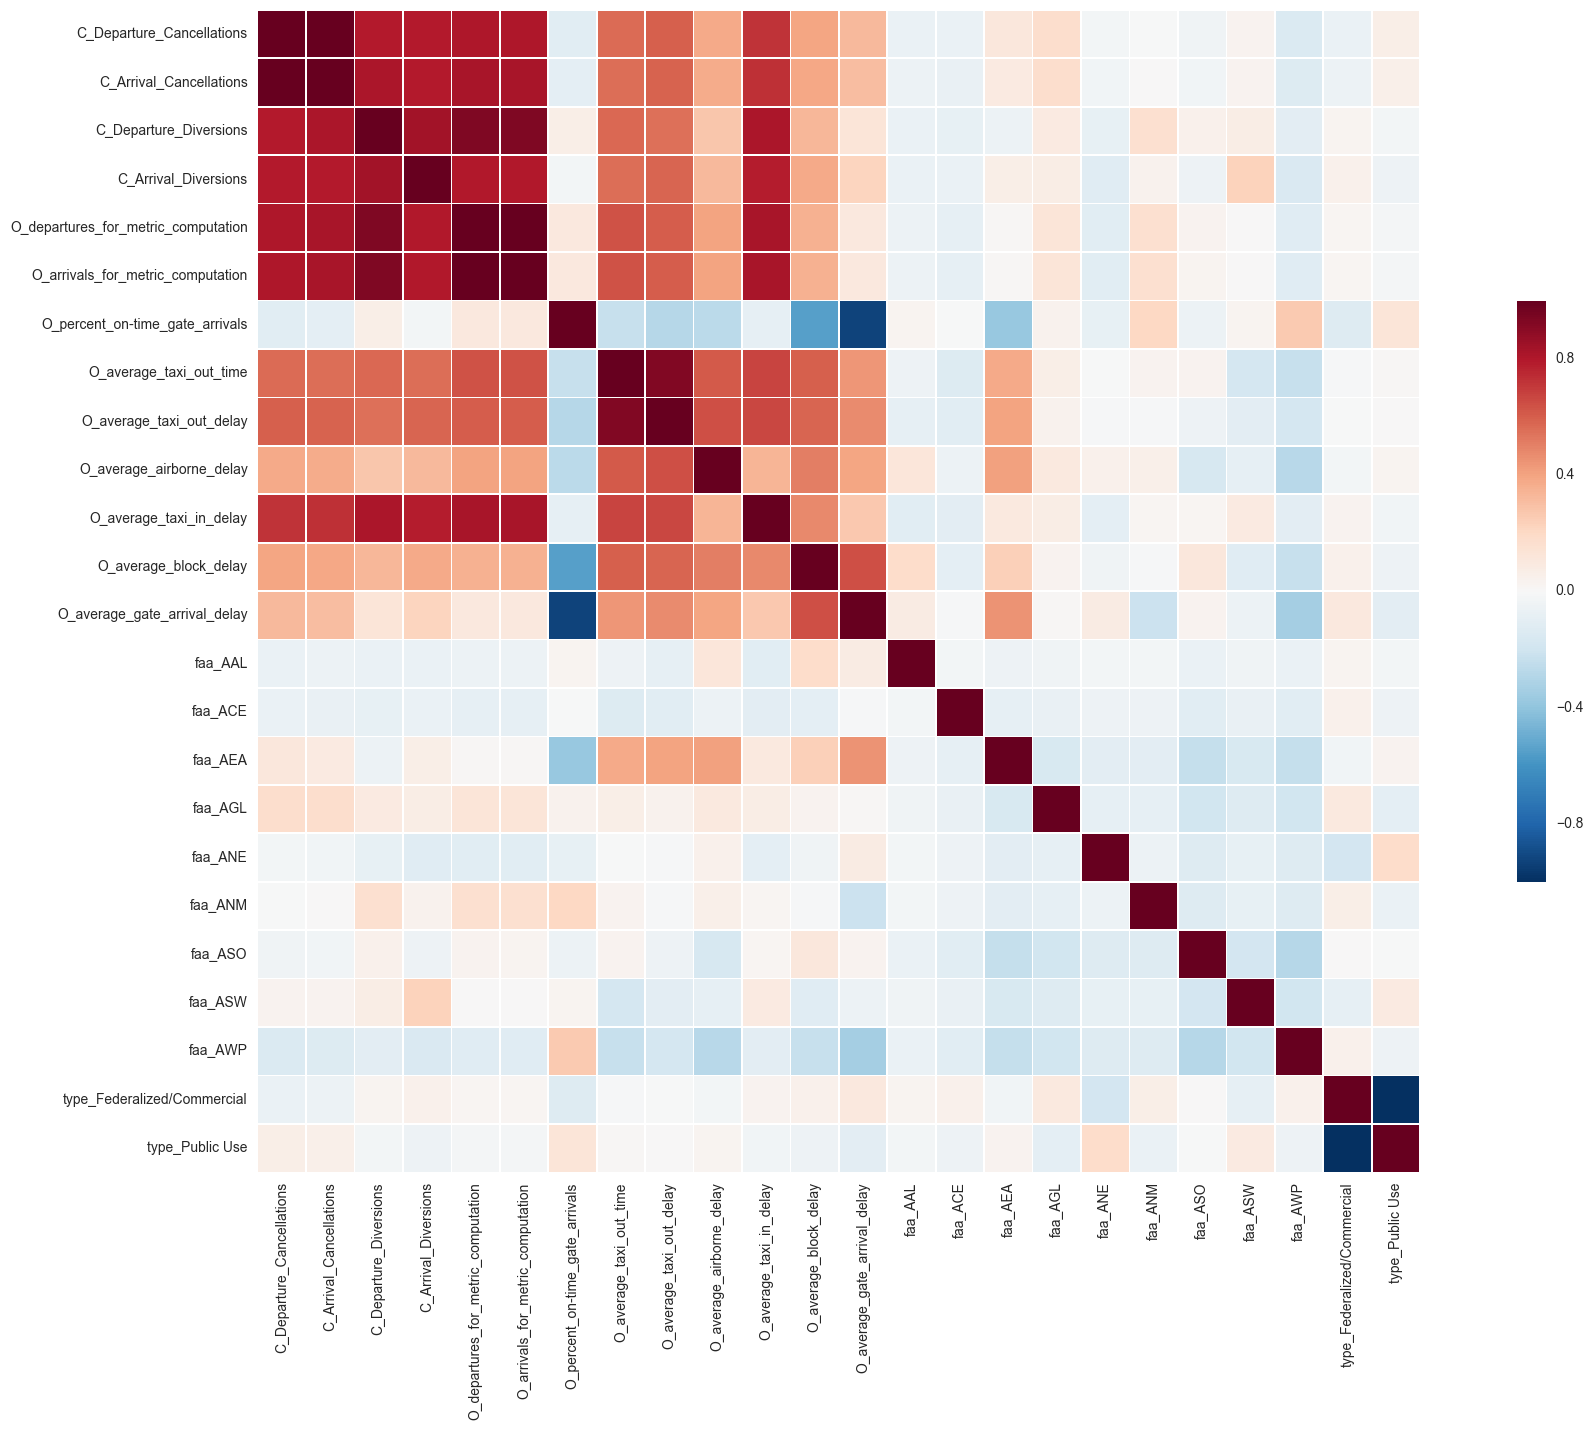

In [22]:
plt.figure(figsize=(25,15))
sns.heatmap(x.corr(), vmax=.3, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

In [23]:
x.corr()

,C_Departure_Cancellations,C_Arrival_Cancellations,C_Departure_Diversions,C_Arrival_Diversions,O_departures_for_metric_computation,O_arrivals_for_metric_computation,O_percent_on-time_gate_arrivals,O_average_taxi_out_time,O_average_taxi_out_delay,O_average_airborne_delay,...,faa_ACE,faa_AEA,faa_AGL,faa_ANE,faa_ANM,faa_ASO,faa_ASW,faa_AWP,type_Federalized/Commercial,type_Public Use
C_Departure_Cancellations,1.000000,0.997464,0.796385,0.792253,0.808959,0.809994,-0.113363,0.566103,0.599671,0.376828,...,-0.069957,0.109628,0.175480,-0.031119,-0.007807,-0.043995,0.036778,-0.144686,-0.062993,0.062993
C_Arrival_Cancellations,0.997464,1.000000,0.814378,0.793773,0.823676,0.824622,-0.094130,0.559625,0.588159,0.367273,...,-0.075860,0.088099,0.179474,-0.037792,0.006725,-0.035929,0.036940,-0.139853,-0.057921,0.057921
C_Departure_Diversions,0.796385,0.814378,1.000000,0.840401,0.934147,0.934035,0.067575,0.571622,0.554316,0.280685,...,-0.084732,-0.061180,0.088135,-0.082173,0.159225,0.051881,0.072087,-0.103698,0.026345,-0.026345
C_Arrival_Diversions,0.792253,0.793773,0.840401,1.000000,0.798750,0.799456,-0.028064,0.558053,0.581730,0.322749,...,-0.068370,0.064986,0.077496,-0.118593,0.040576,-0.047025,0.232455,-0.152526,0.052181,-0.052181
O_departures_for_metric_computation,0.808959,0.823676,0.934147,0.798750,1.000000,0.999807,0.103680,0.638656,0.604125,0.401505,...,-0.088737,0.014196,0.130494,-0.110107,0.161535,0.032944,0.006166,-0.121686,0.020556,-0.020556
O_arrivals_for_metric_computation,0.809994,0.824622,0.934035,0.799456,0.999807,1.000000,0.104228,0.636674,0.603439,0.400179,...,-0.087682,0.015344,0.132095,-0.111841,0.159976,0.029601,0.007365,-0.118813,0.021347,-0.021347
O_percent_on-time_gate_arrivals,-0.113363,-0.094130,0.067575,-0.028064,0.103680,0.104228,1.000000,-0.230311,-0.287357,-0.271240,...,-0.003503,-0.376222,0.041562,-0.085838,0.210340,-0.055615,0.026732,0.264872,-0.132126,0.132126
O_average_taxi_out_time,0.566103,0.559625,0.571622,0.558053,0.638656,0.636674,-0.230311,1.000000,0.923359,0.611870,...,-0.134108,0.377042,0.065552,-0.000846,0.035098,0.038047,-0.177654,-0.233074,-0.013195,0.013195
O_average_taxi_out_delay,0.599671,0.588159,0.554316,0.581730,0.604125,0.603439,-0.287357,0.923359,1.000000,0.642913,...,-0.113627,0.403888,0.039996,-0.010440,-0.009054,-0.047589,-0.107567,-0.174263,-0.006821,0.006821
O_average_airborne_delay,0.376828,0.367273,0.280685,0.322749,0.401505,0.400179,-0.271240,0.611870,0.642913,1.000000,...,-0.058552,0.412229,0.094937,0.048701,0.055131,-0.164284,-0.090102,-0.274128,-0.029160,0.029160


In [24]:
def plot_things(y, x):
    plt.scatter(y, x)
    plt.plot([8, 9, 10], [8, 9, 10])
    plt.xlim((8,10))
    plt.ylim((8,10))
    plt.xlabel('Actual Y values')
    plt.ylabel('Predicted Values')
    plt.show()

In [40]:
def get_cv(target):
    return StratifiedKFold(target, n_folds=3, shuffle=True, random_state=41)

def score(model, data, target):
    model.fit(data, target)
    
    return model.score(data, target)
def grid_search(model, params, cv):
    return GridSearchCV(estimator=model, 
                    param_grid=params,
                    cv=cv
                   )
def check_regression_results(y_true, y_pred):
    output={}
    output['Explained variance regression score: ']=explained_variance_score(y_true, y_pred, multioutput='uniform_average'))
    output['Mean Absolute Error:']=mean_absolute_error(y_true, y_pred)
    print "Explained variance regression score: ", explained_variance_score(y_true, y_pred, multioutput='uniform_average')
    print "Mean Absolute Error:", mean_absolute_error(y_true, y_pred)
    return output

def draw_feature_importance(model, data):
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]
    feature_names = data.columns
    # Plot the feature importances of the model
#     rcParams['figure.figsize'] = 12, 8
    plt.figure(figsize=(25,15))
    plt.title("Feature importances")
    plt.bar(range(data.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(data.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, data.shape[1]])
    plt.show()

def model_test_metrics(model, data, target):
    output['Test Data score: ']=model.fit(data, target).score(data, target)
    print "Test Data score: ", model.fit(data, target).score(data, target)
    dic2 = dict(dic0, **dic1)
    output.update(check_regression_results(target, model.predict(data)))
    return output

def evaluate_model(model, data, target, params=None, draw_features=True, verbose=True):
    output={}
    train_data, test_data, train_target, test_target=train_test_split(data, target)
#     print score(model, train_data, train_target), "\n"
    cv=get_cv(train_target)
    if params:
        grid=grid_search(model, params, cv)
    
        grid.fit(train_data, train_target)
        model = grid.best_estimator_
        output['Best Model after Grid Search: '] = model
        if verbose:
            print "Best Model after Grid Search:\n", model
        
    else:
        model.fit(train_data, train_target)
        
    s=cross_val_score(model, train_data, train_target, cv=cv, n_jobs=-1)
    if verbose:
#         output['mean_score']="Mean score of the model is: {}".format(s.mean())
        print "Mean score of the model is: {}".format(s.mean())
        predictions = model.predict(test_data)
        check_regression_results(test_target, predictions)

    if draw_features:
        draw_feature_importance(model, train_data)
    return model

In [ ]:
def evaluate_random_forest():
    params = {
        'n_estimators': [10, 20, 50, 100, 200],
        'max_depth': [None,1, 2, 3, 4, 5],
        'min_samples_split': [2, 10, 25, 50, 100],
    #     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
    }
    start_time = time.time()
    rf=evaluate_model(RandomForestRegressor(n_jobs=-1), x_train, y_train, params)
    print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3)

In [26]:
a=train_test_split(x, y, test_size=0.3)

In [ ]:
model_test_metrics(rf, x_test, y_test)

In [ ]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
}
start_time = time.time()
et=evaluate_model(ExtraTreesRegressor(n_jobs=-1), x_train, y_train, params)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [ ]:
model_test_metrics(et, x_test, y_test)

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x)

In [ ]:
display_x = pd.concat([x, pd.DataFrame(x_pca)], axis=1)

In [ ]:
plt.figure(figsize=(25,15))
sns.heatmap(display_x.corr(), vmax=.3, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3)

In [ ]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
rf_pca_2=evaluate_model(RandomForestRegressor(n_jobs=-1), x_train, y_train, params, draw_features=False)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [ ]:
model_test_metrics(rf_pca_2, x_test, y_test)

In [ ]:
predictions=rf_pca_2.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(111, projection='3d')
a=x_test[:,0]
b=x_test[:,1]
c=y_test
d=predictions
ax.scatter(a,b,c, c='b', marker='o')
ax.scatter(a,b,d, c='r', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
}
start_time = time.time()
et_pca=evaluate_model(ExtraTreesRegressor(n_jobs=-1), x_train, y_train, params, draw_features=False)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [ ]:
model_test_metrics(et_pca, x_test, y_test)

In [ ]:
def find_best_n_components(data):
    x_standard = StandardScaler().fit_transform(data)
    cov_mat=np.cov(x_standard.T)
    eigenvalues, eigenvectors=np.linalg.eig(cov_mat)
    eigenValSum=sum(eigenvalues)
    varianceExplained=[(i/eigenValSum)*100 for i in sorted(eigenvalues, reverse=True)]
    cumulativeVarianceExplained=np.cumsum(varianceExplained)
    return cumulativeVarianceExplained

In [ ]:
find_best_n_components(x)

It seems `10` and `12` is the most reasonable number of components we can choose

In [ ]:
pca=PCA(n_components=10)
x_pca=pca.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3)
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
rf_pca=evaluate_model(RandomForestRegressor(n_jobs=-1), x_train, y_train, params, draw_features=False)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [ ]:
pca=PCA(n_components=12)
x_pca=pca.fit_transform(x)
x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3)
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
rf_pca=evaluate_model(RandomForestRegressor(n_jobs=-1), x_train, y_train, params, draw_features=False)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [ ]:
def best_results_with_components(model, data, target, params=None):
#     for n in range(1, len(data.columns)):
    best_score=0
    best_n=0
    best_model=None
    for n in range(2, len(data.columns)):
        pca=PCA(n_components=n)
        data_pca=pca.fit_transform(x)
        x_train, x_test, y_train, y_test=train_test_split(x_pca, y, test_size=0.3)
        model=evaluate_model(model, x_train, y_train, params, draw_features=False, verbose=False)
        score=model.fit(x_test, y_test).score(x_test, y_test)
        if score > best_score:
            best_score=score
            best_n=n
            best_model=model
    return (best_model, best_n)

In [ ]:
params = {
    'n_estimators': [10, 20, 50, 100, 200],
    'max_depth': [None,1, 2, 3, 4, 5],
    'min_samples_split': [2, 10, 25, 50, 100],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 10]
}
start_time = time.time()
model, n=best_results_with_components(RandomForestRegressor(n_jobs=-1), x, y, params=params)
print 'This operation took '+ str(time.time() - start_time) + " seconds"

In [ ]:
print "Highest score for models acheived  with %s number of components" % n

In [ ]:
model_test_metrics(model, x_test, y_test)